Station 1: KK - Directory: F:\DataExtractionStations\KK.csv
Station 2: LEW - Directory: F:\DataExtractionStations\LEW.csv
Station 3: ANN - Directory: F:\DataExtractionStations\ANN.csv
--------------------------------------------------------------------------
Station 1: KK - Directory: F:\DataExtractionStations\KK.csv
Station 2: LEW - Directory: F:\DataExtractionStations\LEW.csv
Station 3: ANN - Directory: F:\DataExtractionStations\ANN.csv
--------------------------------------------------------------------------
Station 1: KK - Directory: F:\DataExtractionStations\KK.csv
Station 2: LEW - Directory: F:\DataExtractionStations\LEW.csv
Station 3: ANN - Directory: F:\DataExtractionStations\ANN.csv
--------------------------------------------------------------------------
Station 1: KK - Directory: F:\DataExtractionStations\KK.csv
Station 2: LEW - Directory: F:\DataExtractionStations\LEW.csv
Station 3: ANN - Directory: F:\DataExtractionStations\ANN.csv
---------------------------------------

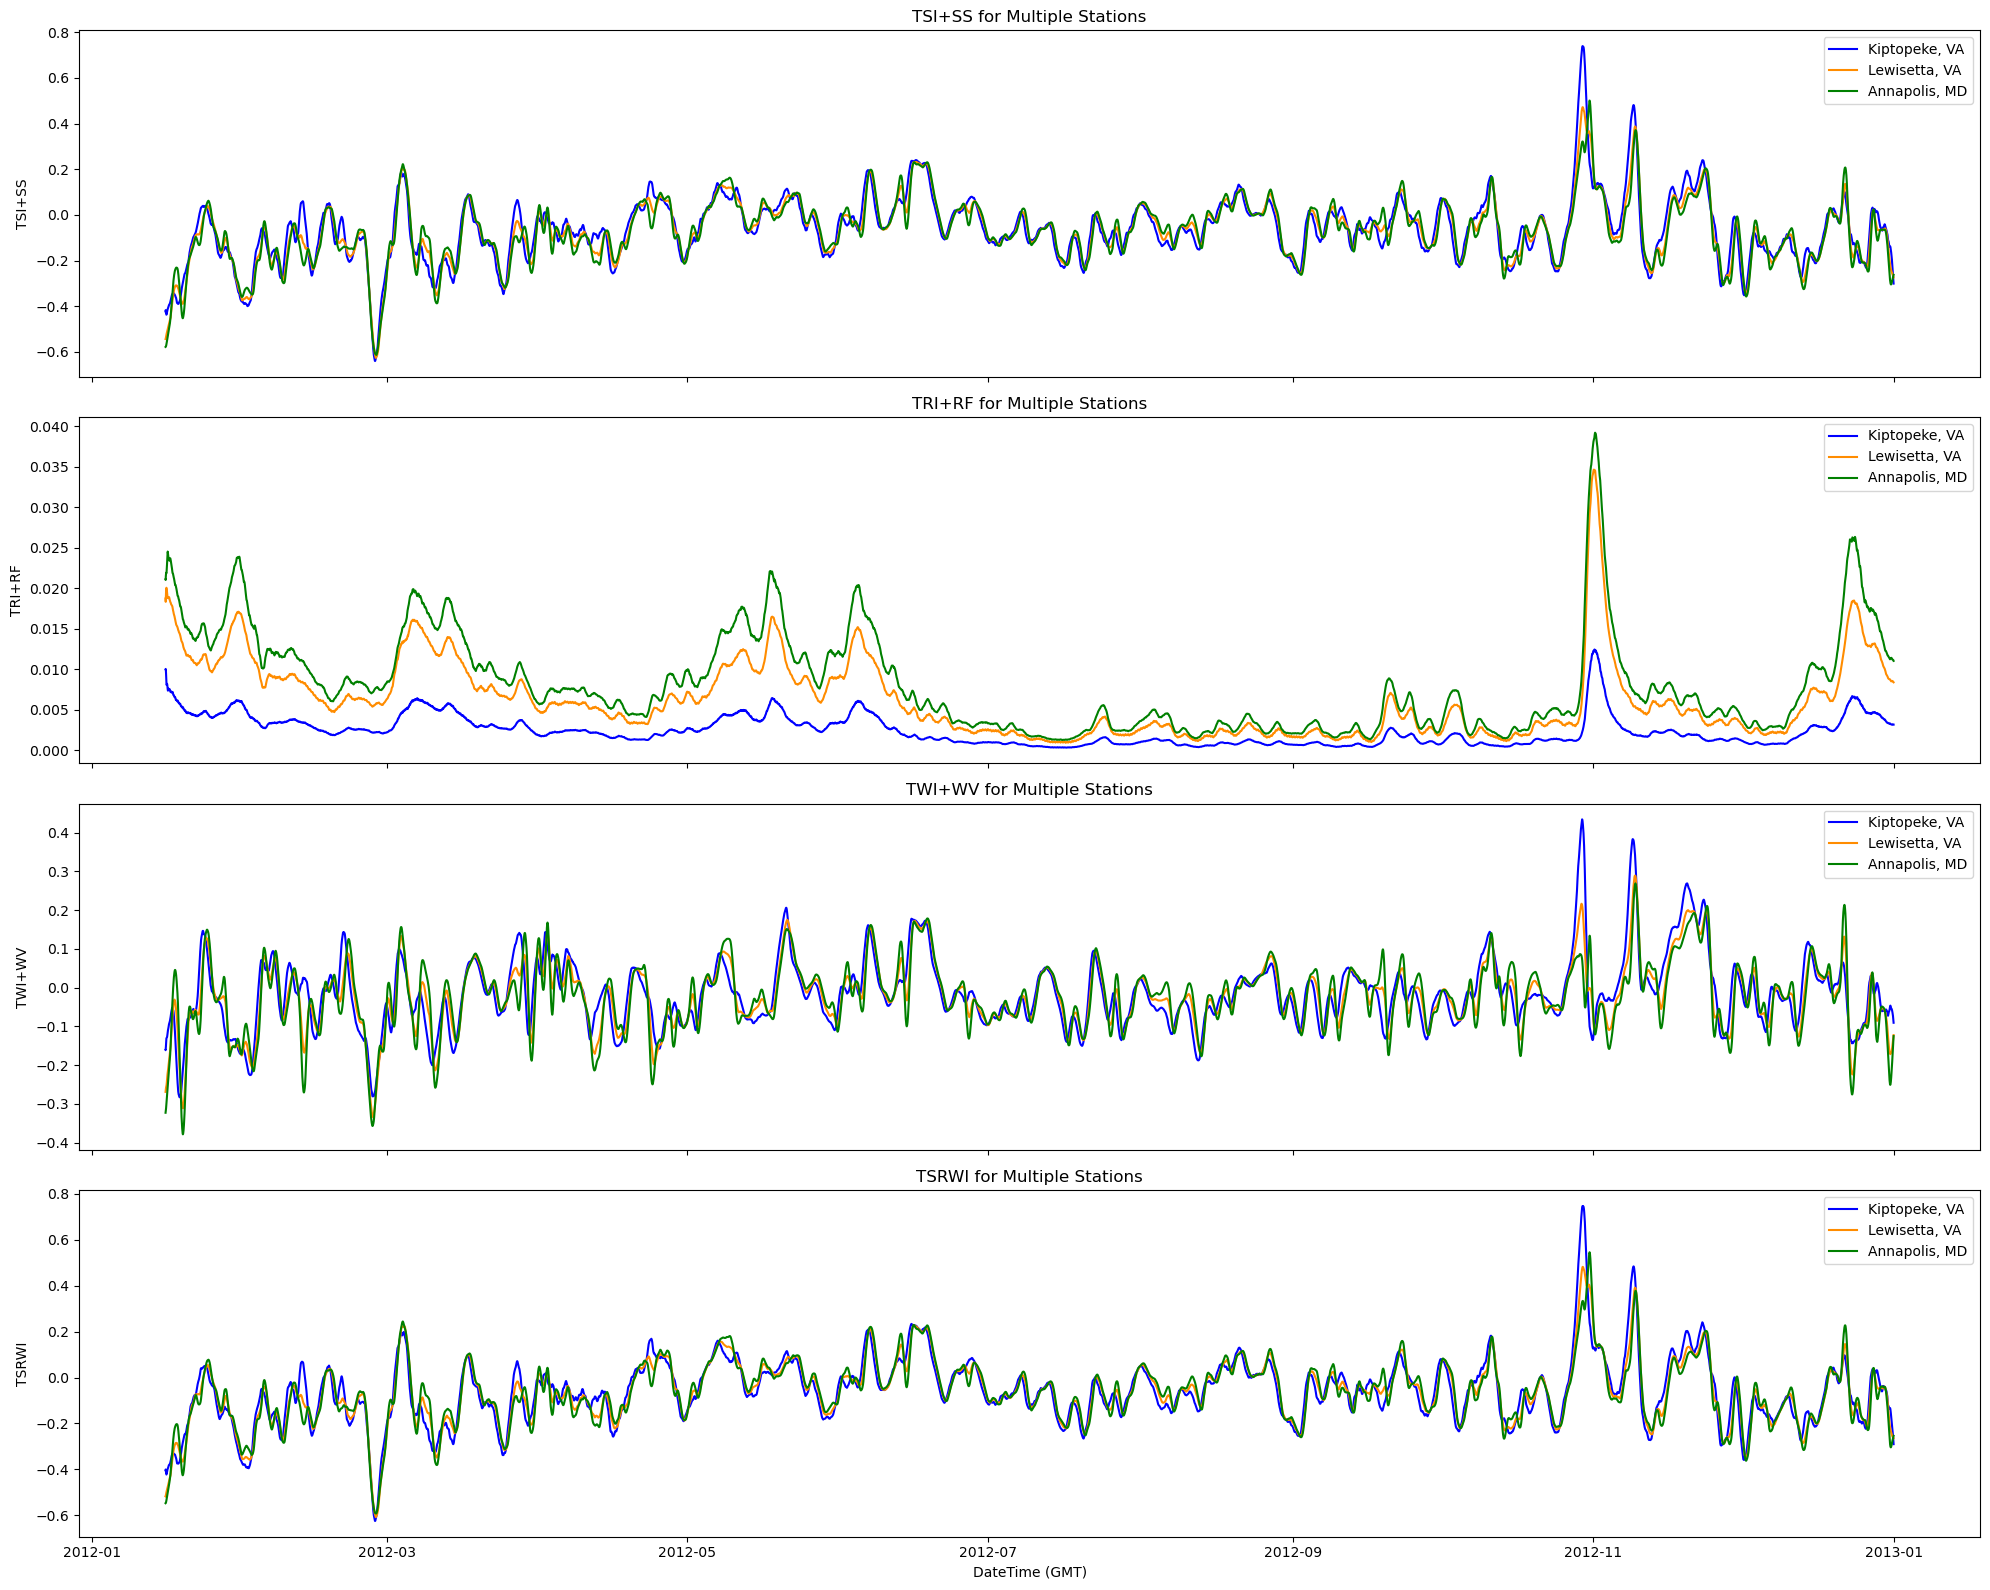

In [18]:
import time
import glob
from netCDF4 import Dataset
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

station_dict = {
    "SP": "Sewells Point, VA",
    "MP": "Money Point, VA",
    "KK": "Kiptopeke, VA",
    "WAC": "Wachapreague, VA",
    "YOR": "Yorktown USCG, VA",
    "WP": "Windmill Point, VA",
    "OC": "Ocean City Inlet, MD",
    "LEW": "Lewisetta, VA",
    "SI": "Solomons Island, MD",
    "DC": "Washington, DC",
    "BH": "Bishops Head, MD",
    "CC": "Chesapeake City, MD",
    "BAL": "Baltimore, MD",
    "TB": "Tolchester Beach, MD",
    "ANN": "Annapolis, MD",
    "CAM": "Cambridge, MD",
    "DAH": "Dahlgren, VA",
    "CBBT": "CBBT, Chesapeake Channel, VA"
}

# importing and formatting the data to standard format

####################### INPUT START #############################
stations = ['KK', 'LEW', 'ANN']
input_directory = r'F:\DataExtractionStations'

fig, axs = plt.subplots(4, 1, figsize=(20, 16), sharex=True)

palette = ['blue', 'darkorange', 'green']  # Colors for the three stations

window_size = 240 # data is at 6min interval. So 240 datapoints represent 1day

####################### INPUT END #############################
columns = ['TSI+SS', 'TRI+RF', 'TWI+WV', 'TSRWI']  # Metrics for the 4 rows

for col_idx, col in enumerate(columns):
    for station_idx, station in enumerate(stations):
        directory_path = f"{input_directory}\\{station}.csv"
        print(f"Station {station_idx + 1}: {station} - Directory: {directory_path}")

        data_raw = pd.read_csv(directory_path)

        rename_mapping = {
            'TideOnly': 'Harmonic Tide',
            'Surge': 'Surge',
            'RiverTide': 'RiverTide',
            'Wave': 'Wave',
            'AllForcing': 'AllForcing'
        }
        
        data_raw.rename(columns=lambda x: next((v for k, v in rename_mapping.items() if k in x), x), inplace=True)
        
        # Calculate the required columns
        data_raw['TSI+SS'] = data_raw['Surge'] - data_raw['Harmonic Tide']
        data_raw['TRI+RF'] = data_raw['RiverTide'] - data_raw['Harmonic Tide']
        data_raw['TWI+WV'] = data_raw['Wave'] - data_raw['Harmonic Tide']
        data_raw['TSRWI'] = data_raw['AllForcing'] - data_raw['Harmonic Tide']
        
        # isolate the required data for plotting
        data_df = data_raw[['DateTime (GMT)', col]]
        data_df = data_df.iloc[10*24*15:,:].reset_index(drop=True)
        
        data_df['DateTime (GMT)'] = pd.to_datetime(data_df['DateTime (GMT)'])
        
        # Apply rolling window
        data_df[col] = data_df[col].rolling(window=window_size, min_periods=1).mean()

        # Plot each station's data in the corresponding subplot
        sns.lineplot(x='DateTime (GMT)', y=col, data=data_df, ax=axs[col_idx], label=station_dict[station], color=palette[station_idx], alpha=1.0)
    
    axs[col_idx].set_title(f'{col} for Multiple Stations')
    axs[col_idx].set_ylabel(col)

    axs[col_idx].legend()
    print('--------------------------------------------------------------------------')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
